In [38]:
import pandas as pd
import warnings
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import missingno as msno

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [40]:
data = pd.read_csv('dataset_final.csv')

In [42]:
data

,RBD,Average PSU,Average NEM,in_2018,in_2019,ingreso_superior,prom_notas_alu,MRUN,cod_reg_rbd,cod_pro_rbd,cod_com_rbd,nom_com_rbd,nom_deprov_rbd,cod_depe2,rural_rbd,cod_ense,cod_grado2,cod_jor,cod_des_cur,gen_alu,edad_alu,cod_reg_alu,cod_com_alu,nom_com_alu,I_VUL
0,1,415.960227,5.585470,0.0,0.0,0.0,6.0,20754,15.0,151.0,15101.0,ARICA,ARICA,1.0,0.0,563.0,4.0,4.0,1.0,1.0,35,1.0,1101.0,IQUIQUE,0.815461
1,1,415.960227,5.585470,0.0,0.0,0.0,5.7,223163,15.0,151.0,15101.0,ARICA,ARICA,1.0,0.0,563.0,4.0,4.0,1.0,1.0,29,15.0,15101.0,ARICA,0.815461
2,1,415.960227,5.585470,0.0,0.0,0.0,5.4,618536,15.0,151.0,15101.0,ARICA,ARICA,1.0,0.0,663.0,4.0,4.0,1.0,2.0,21,2.0,2101.0,ANTOFAGASTA,0.815461
3,1,415.960227,5.585470,0.0,0.0,0.0,6.7,639205,15.0,151.0,15101.0,ARICA,ARICA,1.0,0.0,610.0,4.0,1.0,1.0,2.0,17,15.0,15101.0,ARICA,0.815461
4,1,415.960227,5.585470,0.0,0.0,0.0,6.2,689523,15.0,151.0,15101.0,ARICA,ARICA,1.0,0.0,610.0,4.0,1.0,1.0,2.0,17,15.0,15101.0,ARICA,0.815461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233276,10541,453.980315,5.394201,1.0,0.0,1.0,6.3,24046519,13.0,134.0,13401.0,SAN BERNARDO,SANTIAGO SUR,4.0,0.0,410.0,4.0,1.0,1.0,1.0,17,13.0,13116.0,LO ESPEJO,0.905721
233277,10541,453.980315,5.394201,1.0,0.0,1.0,5.6,24069189,13.0,134.0,13401.0,SAN BERNARDO,SANTIAGO SUR,4.0,0.0,410.0,4.0,3.0,3.0,1.0,17,13.0,13401.0,SAN BERNARDO,0.905721
233278,10541,453.980315,5.394201,1.0,0.0,1.0,6.1,24384950,13.0,134.0,13401.0,SAN BERNARDO,SANTIAGO SUR,4.0,0.0,410.0,4.0,1.0,3.0,2.0,18,13.0,13401.0,SAN BERNARDO,0.905721
233279,10541,453.980315,5.394201,0.0,1.0,1.0,5.9,24431844,13.0,134.0,13401.0,SAN BERNARDO,SANTIAGO SUR,4.0,0.0,410.0,4.0,1.0,3.0,2.0,17,13.0,13401.0,SAN BERNARDO,0.905721


### Se seleccionan columnas a utilizar para el modelo

In [44]:
data_modelos = data.drop(columns=['in_2018', 'in_2019', 'MRUN', 'nom_com_rbd', 'nom_deprov_rbd', 'cod_grado2', 'nom_com_alu'])

### se normalizan los nombres de las columnas

In [46]:
data_modelos.columns = map(lambda text: text.lower().replace(' ', '_'), data_modelos.columns)
data_modelos

,rbd,average_psu,average_nem,ingreso_superior,prom_notas_alu,cod_reg_rbd,cod_pro_rbd,cod_com_rbd,cod_depe2,rural_rbd,cod_ense,cod_jor,cod_des_cur,gen_alu,edad_alu,cod_reg_alu,cod_com_alu,i_vul
0,1,415.960227,5.585470,0.0,6.0,15.0,151.0,15101.0,1.0,0.0,563.0,4.0,1.0,1.0,35,1.0,1101.0,0.815461
1,1,415.960227,5.585470,0.0,5.7,15.0,151.0,15101.0,1.0,0.0,563.0,4.0,1.0,1.0,29,15.0,15101.0,0.815461
2,1,415.960227,5.585470,0.0,5.4,15.0,151.0,15101.0,1.0,0.0,663.0,4.0,1.0,2.0,21,2.0,2101.0,0.815461
3,1,415.960227,5.585470,0.0,6.7,15.0,151.0,15101.0,1.0,0.0,610.0,1.0,1.0,2.0,17,15.0,15101.0,0.815461
4,1,415.960227,5.585470,0.0,6.2,15.0,151.0,15101.0,1.0,0.0,610.0,1.0,1.0,2.0,17,15.0,15101.0,0.815461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233276,10541,453.980315,5.394201,1.0,6.3,13.0,134.0,13401.0,4.0,0.0,410.0,1.0,1.0,1.0,17,13.0,13116.0,0.905721
233277,10541,453.980315,5.394201,1.0,5.6,13.0,134.0,13401.0,4.0,0.0,410.0,3.0,3.0,1.0,17,13.0,13401.0,0.905721
233278,10541,453.980315,5.394201,1.0,6.1,13.0,134.0,13401.0,4.0,0.0,410.0,1.0,3.0,2.0,18,13.0,13401.0,0.905721
233279,10541,453.980315,5.394201,1.0,5.9,13.0,134.0,13401.0,4.0,0.0,410.0,1.0,3.0,2.0,17,13.0,13401.0,0.905721


### Se verifican tipos de datos

In [48]:
data_modelos = data_modelos.astype({'rbd': 'int', 'cod_reg_rbd': 'int', 'cod_pro_rbd': 'int', 'cod_com_rbd': 'int', 
                                    'cod_depe2': 'int', 'cod_ense': 'int', 'cod_jor': 'int', 'cod_des_cur': 'int', 
                                    'gen_alu': 'int', 'cod_reg_alu': 'int', 'cod_com_alu': 'int'})

In [50]:
data_modelos = data_modelos.astype({'average_psu': 'float', 'average_nem': 'float', 
                                    'prom_notas_alu': 'float', 'i_vul': 'float'})
data_modelos

,rbd,average_psu,average_nem,ingreso_superior,prom_notas_alu,cod_reg_rbd,cod_pro_rbd,cod_com_rbd,cod_depe2,rural_rbd,cod_ense,cod_jor,cod_des_cur,gen_alu,edad_alu,cod_reg_alu,cod_com_alu,i_vul
0,1,415.960227,5.585470,0.0,6.0,15,151,15101,1,0.0,563,4,1,1,35,1,1101,0.815461
1,1,415.960227,5.585470,0.0,5.7,15,151,15101,1,0.0,563,4,1,1,29,15,15101,0.815461
2,1,415.960227,5.585470,0.0,5.4,15,151,15101,1,0.0,663,4,1,2,21,2,2101,0.815461
3,1,415.960227,5.585470,0.0,6.7,15,151,15101,1,0.0,610,1,1,2,17,15,15101,0.815461
4,1,415.960227,5.585470,0.0,6.2,15,151,15101,1,0.0,610,1,1,2,17,15,15101,0.815461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233276,10541,453.980315,5.394201,1.0,6.3,13,134,13401,4,0.0,410,1,1,1,17,13,13116,0.905721
233277,10541,453.980315,5.394201,1.0,5.6,13,134,13401,4,0.0,410,3,3,1,17,13,13401,0.905721
233278,10541,453.980315,5.394201,1.0,6.1,13,134,13401,4,0.0,410,1,3,2,18,13,13401,0.905721
233279,10541,453.980315,5.394201,1.0,5.9,13,134,13401,4,0.0,410,1,3,2,17,13,13401,0.905721


In [52]:
for atributo in data_modelos.columns:
    if data_modelos[atributo].dtype == 'O':
        print(atributo)

edad_alu


### Se verifican tipo de datos

In [54]:
data_modelos = data_modelos.astype({'edad_alu': 'int'})

ValueError: invalid literal for int() with base 10: ' '

In [55]:
len(data_modelos[data_modelos['edad_alu'] == ' '])

1

### Existe solo un registro con valor faltande para la edad del alumno, por lo que se borrará

In [56]:
data_modelos = data_modelos[data_modelos['edad_alu'] != ' ']
data_modelos = data_modelos.astype({'edad_alu': 'int'})

### Se verifican datos perdidos

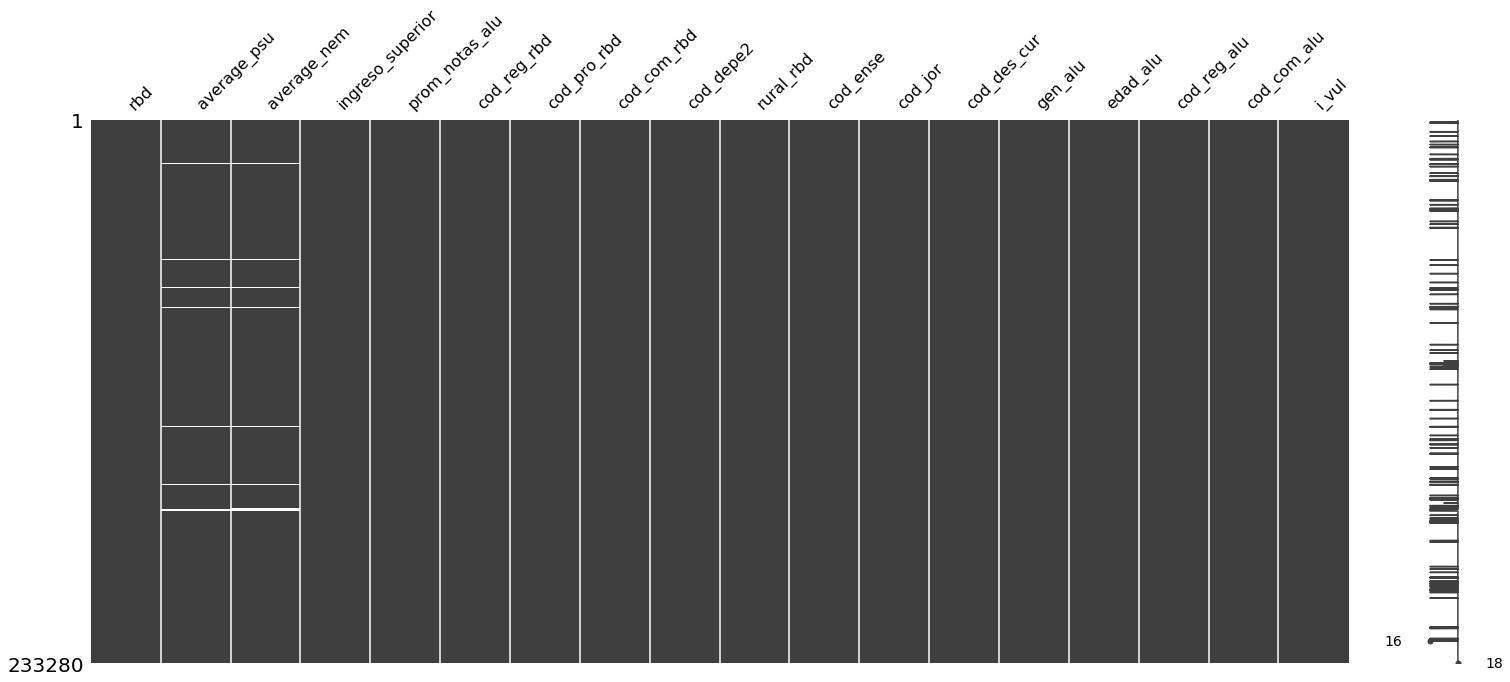

In [57]:
msno.matrix(data_modelos) 

### En el analisis exploratorio se detectaron 4032 registros con datos perdidos para average_psu y 	average_nem equivalentes al 1.73% de los resgistros. Considerando la baja proporción, se decide borrar estos registros.

In [58]:
data_modelos = data_modelos.dropna()
len(data_modelos)

229248

In [59]:
data_modelos.to_csv('data_modelos.csv', index = False, header=True)

### Se binarizan variables categoricas

- rbd
- cod_reg_rbd
- cod_pro_rbd	
- cod_com_rbd	
- cod_depe2
- cod_ense	
- cod_jor	
- cod_des_cur	
- gen_alu
- cod_reg_alu
- cod_com_alu

In [60]:
list_atributos_dummies = ['rbd', 'cod_reg_rbd', 'cod_pro_rbd', 'cod_com_rbd', 'cod_depe2', 'cod_ense', 'cod_jor', 
                          'cod_des_cur', 'gen_alu', 'cod_reg_alu', 'cod_com_alu']

In [61]:
df_data_binary = data_modelos.copy()
for category in list_atributos_dummies:
    df_dummy = pd.get_dummies(data=df_data_binary[category], drop_first=False, prefix=category)
    df_data_binary = df_data_binary.join(df_dummy)
    df_data_binary.drop(columns=category, inplace=True)
df_data_binary

,average_psu,average_nem,ingreso_superior,prom_notas_alu,rural_rbd,edad_alu,i_vul,rbd_1,rbd_4,rbd_5,rbd_7,rbd_8,rbd_15,rbd_28,rbd_32,rbd_45,rbd_50,rbd_52,rbd_56,rbd_59,rbd_60,rbd_67,rbd_69,rbd_78,rbd_97,rbd_103,rbd_106,rbd_107,rbd_108,rbd_109,rbd_110,rbd_124,rbd_125,rbd_127,rbd_130,rbd_131,rbd_132,rbd_133,rbd_134,rbd_144,rbd_161,rbd_178,rbd_191,rbd_199,rbd_200,rbd_208,rbd_211,rbd_217,rbd_218,rbd_219,rbd_220,rbd_222,rbd_253,rbd_254,rbd_255,rbd_256,rbd_257,rbd_279,rbd_280,rbd_282,rbd_283,rbd_284,rbd_285,rbd_286,rbd_287,rbd_304,rbd_335,rbd_336,rbd_337,rbd_341,rbd_342,rbd_344,rbd_355,rbd_356,rbd_357,rbd_358,rbd_361,rbd_364,rbd_365,rbd_366,rbd_367,rbd_372,rbd_373,rbd_379,rbd_384,rbd_392,rbd_396,rbd_397,rbd_399,rbd_400,rbd_415,rbd_419,rbd_429,rbd_430,rbd_431,rbd_433,rbd_437,rbd_438,rbd_440,rbd_441,rbd_448,rbd_449,rbd_478,rbd_479,rbd_486,rbd_487,rbd_516,rbd_517,rbd_518,rbd_526,rbd_530,rbd_532,rbd_535,rbd_565,rbd_567,rbd_568,rbd_570,rbd_573,rbd_574,rbd_575,rbd_578,rbd_579,rbd_580,rbd_581,rbd_582,rbd_583,rbd_585,rbd_587,rbd_589,rbd_590,rbd_591,rbd_609,rbd_610,rbd_611,rbd_613,rbd_629,rbd_646,rbd_647,rbd_648,rbd_649,rbd_656,rbd_664,rbd_665,rbd_690,rbd_701,rbd_704,rbd_705,rbd_763,rbd_766,rbd_768,rbd_769,rbd_770,rbd_772,rbd_774,rbd_799,rbd_802,rbd_845,rbd_964,rbd_967,rbd_968,rbd_987,rbd_988,rbd_1013,rbd_1036,rbd_1048,rbd_1119,rbd_1120,rbd_1121,rbd_1123,rbd_1148,rbd_1149,rbd_1164,rbd_1167,rbd_1183,rbd_1190,rbd_1194,rbd_1195,rbd_1196,rbd_1198,rbd_1199,rbd_1206,rbd_1213,rbd_1214,rbd_1225,rbd_1226,rbd_1255,rbd_1260,rbd_1261,rbd_1262,rbd_1263,rbd_1264,rbd_1288,rbd_1289,rbd_1290,rbd_1291,rbd_1294,rbd_1300,rbd_1301,rbd_1302,rbd_1318,rbd_1327,rbd_1335,rbd_1347,rbd_1354,rbd_1361,rbd_1362,rbd_1363,rbd_1364,rbd_1366,rbd_1391,rbd_1392,rbd_1393,rbd_1395,rbd_1397,rbd_1400,rbd_1403,rbd_1404,rbd_1405,rbd_1412,rbd_1414,rbd_1421,rbd_1422,rbd_1425,rbd_1436,rbd_1437,rbd_1443,rbd_1444,rbd_1449,rbd_1450,rbd_1453,rbd_1464,rbd_1478,rbd_1482,rbd_1489,rbd_1500,rbd_1502,rbd_1503,rbd_1504,rbd_1507,rbd_1515,rbd_1516,rbd_1517,rbd_1518,rbd_1519,rbd_1520,rbd_1521,rbd_1522,rbd_1525,rbd_1549,rbd_1579,...,cod_com_alu_6201,cod_com_alu_6202,cod_com_alu_6203,cod_com_alu_6204,cod_com_alu_6205,cod_com_alu_6206,cod_com_alu_6301,cod_com_alu_6302,cod_com_alu_6303,cod_com_alu_6304,cod_com_alu_6305,cod_com_alu_6306,cod_com_alu_6307,cod_com_alu_6308,cod_com_alu_6309,cod_com_alu_6310,cod_com_alu_7101,cod_com_alu_7102,cod_com_alu_7103,cod_com_alu_7104,cod_com_alu_7105,cod_com_alu_7106,cod_com_alu_7107,cod_com_alu_7108,cod_com_alu_7109,cod_com_alu_7110,cod_com_alu_7201,cod_com_alu_7202,cod_com_alu_7203,cod_com_alu_7301,cod_com_alu_7302,cod_com_alu_7303,cod_com_alu_7304,cod_com_alu_7305,cod_com_alu_7306,cod_com_alu_7307,cod_com_alu_7308,cod_com_alu_7309,cod_com_alu_7401,cod_com_alu_7402,cod_com_alu_7403,cod_com_alu_7404,cod_com_alu_7405,cod_com_alu_7406,cod_com_alu_7407,cod_com_alu_7408,cod_com_alu_8101,cod_com_alu_8102,cod_com_alu_8103,cod_com_alu_8104,cod_com_alu_8105,cod_com_alu_8106,cod_com_alu_8107,cod_com_alu_8108,cod_com_alu_8109,cod_com_alu_8110,cod_com_alu_8111,cod_com_alu_8112,cod_com_alu_8201,cod_com_alu_8202,cod_com_alu_8203,cod_com_alu_8204,cod_com_alu_8205,cod_com_alu_8206,cod_com_alu_8207,cod_com_alu_8301,cod_com_alu_8302,cod_com_alu_8303,cod_com_alu_8304,cod_com_alu_8305,cod_com_alu_8306,cod_com_alu_8307,cod_com_alu_8308,cod_com_alu_8309,cod_com_alu_8310,cod_com_alu_8311,cod_com_alu_8312,cod_com_alu_8313,cod_com_alu_8314,cod_com_alu_8401,cod_com_alu_8402,cod_com_alu_8403,cod_com_alu_8404,cod_com_alu_8405,cod_com_alu_8406,cod_com_alu_8407,cod_com_alu_8408,cod_com_alu_8409,cod_com_alu_8410,cod_com_alu_8411,cod_com_alu_8412,cod_com_alu_8413,cod_com_alu_8414,cod_com_alu_8415,cod_com_alu_8416,cod_com_alu_8417,cod_com_alu_8418,cod_com_alu_8419,cod_com_alu_8420,cod_com_alu_8421,cod_com_alu_9101,cod_com_alu_9102,cod_com_alu_9103,cod_com_alu_9104,cod_com_alu_9105,cod_com_alu_9106,cod_com_alu_9107,cod_com_alu_9108,cod_com_alu_9109,cod_com_alu_9110,cod_com_alu_9111,cod_com_alu_9112,c

### se separa train y test

In [ ]:
X = df_data_binary.drop(columns='ingreso_superior')
y = df_data_binary.loc[:, 'ingreso_superior']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(random_state=0, verbose=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
for i in clf.feature_importances_:
    print(i)

In [ ]:
feature_importances = clf.feature_importances_

In [ ]:
feature_importances

In [ ]:
df_importance = pd.DataFrame({'feature':X_train.columns, 'importance': feature_importances})

In [ ]:
df_importance.sort_values(by='importance', ascending=False, inplace=True)

In [ ]:
df_importance = df_importance[df_importance['importance']>0]

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
plt.figure(figsize=(10,15))
plt.barh(df_importance.feature[:20], df_importance.importance[:20])
plt.ylabel('Atributo')
plt.xlabel('Importancia relativa')